In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
from mpl_toolkits import mplot3d # For 3D graphs
import utils as utils # Function created for this project, see utils.py

In [10]:
utils.create_directories()

file = open("results_sample.txt", "w")

start_time = time.time()

In [11]:
resolution = 10 # in um
pad = 0 # in pixels

profile = [] 
end_time = start_iteration_time = elapsed_time = 0

In [12]:
image = plt.imread("img/balloon_folded.png")
image = np.asarray(image)
    
## Preprocessing, i.e. filtering of the image (path: /exp/filt/gauss/*.pdf)
img_filtered = utils.gaussian_filter(image, 
                                     sigma=0.2,  
                                     show="False")
       
## Call function find_radii to iterate through the whole image and calculate the radius
profile, index = utils.find_radii(img_filtered, res=resolution, sigma=0.2, show="False")
  
## Stop timer and print timestempt ot the console
end_time = time.time()

## Important: Close file to free up the memory (!)
file.close()

In [13]:
elapsed_time = round(end_time - start_time,2)
print(elapsed_time,"sec",)

12.58 sec


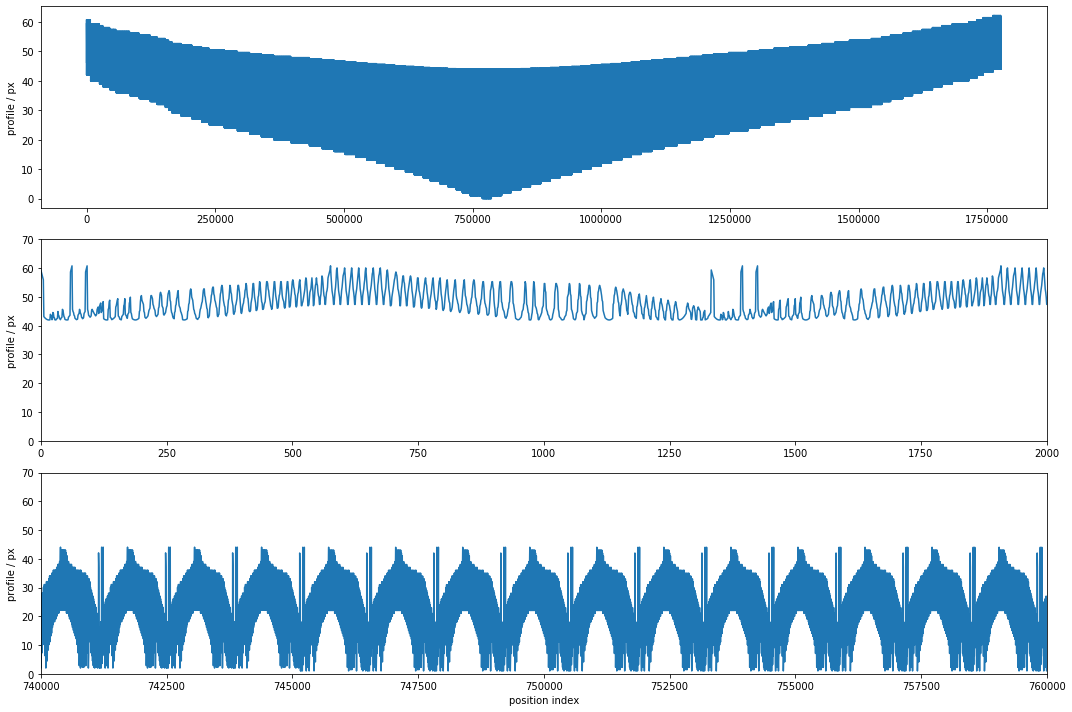

In [48]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(311)
plt.plot(profile)
plt.ylabel('profile / px')

plt.subplot(312)
plt.plot(profile)
plt.axis([0, 2000, 0, 70])
plt.ylabel('profile / px')

plt.subplot(313)
plt.plot(profile)
plt.axis([740000, 760000, 0, 70])
        
plt.xlabel('position index')
plt.ylabel('profile / px')
plt.tight_layout()
plt.show()

fig.savefig('balloonprofile.png') # save the figure to file
